Join with pyspark
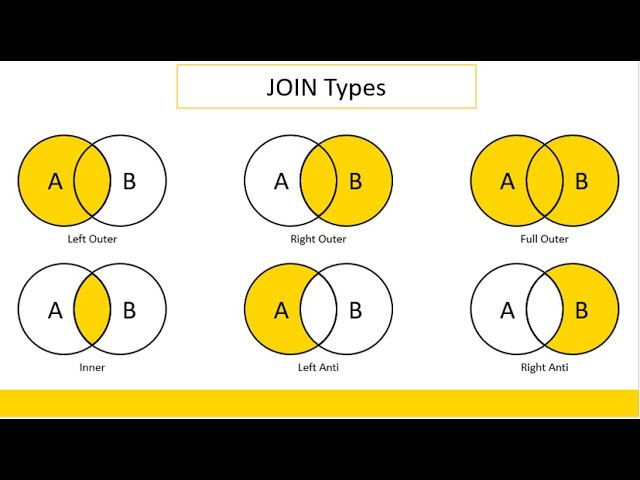

In [6]:
from pyspark.sql import types
from pyspark.sql import functions
import scipy.signal

valuesA = [
    ('a', 1, 5),
    ('b', 2, 6),
    ('c', 3, 7),
    ('d', 4, 8),
]

df_a = spark.createDataFrame(valuesA,['bid_id', 'val1', 'val2'])

df_a.show()

valuesB = [
    ('a', 9, 13),
    ('b', 10, 14),
    ('e', 11, 15),
    ('f', 12, 16),
]

df_b = spark.createDataFrame(valuesB,['bid_id', 'val3', 'val4'])

df_b.show()


+------+----+----+
|bid_id|val1|val2|
+------+----+----+
|     a|   1|   5|
|     b|   2|   6|
|     c|   3|   7|
|     d|   4|   8|
+------+----+----+

+------+----+----+
|bid_id|val3|val4|
+------+----+----+
|     a|   9|  13|
|     b|  10|  14|
|     e|  11|  15|
|     f|  12|  16|
+------+----+----+



In [14]:
# inner 
df_a.join(df_b, ['bid_id']).show()

# only df_a columns
df_a.join(df_b, ['bid_id']).select(df_a.bid_id, df_a.val1, df_a.val2).show()

# only df_b columns
df_a.join(df_b, ['bid_id']).select(df_a.bid_id, df_b.val3, df_b.val4).show()

+------+----+----+----+----+
|bid_id|val1|val2|val3|val4|
+------+----+----+----+----+
|     a|   1|   5|   9|  13|
|     b|   2|   6|  10|  14|
+------+----+----+----+----+

+------+----+----+
|bid_id|val1|val2|
+------+----+----+
|     a|   1|   5|
|     b|   2|   6|
+------+----+----+

+------+----+----+
|bid_id|val3|val4|
+------+----+----+
|     a|   9|  13|
|     b|  10|  14|
+------+----+----+



In [15]:
# left outer
df_a.join(df_b, ['bid_id'], how='left').show()

+------+----+----+----+----+
|bid_id|val1|val2|val3|val4|
+------+----+----+----+----+
|     a|   1|   5|   9|  13|
|     b|   2|   6|  10|  14|
|     c|   3|   7|null|null|
|     d|   4|   8|null|null|
+------+----+----+----+----+



In [16]:
# right outer
df_a.join(df_b, ['bid_id'], how='right').show()

+------+----+----+----+----+
|bid_id|val1|val2|val3|val4|
+------+----+----+----+----+
|     a|   1|   5|   9|  13|
|     b|   2|   6|  10|  14|
|     e|null|null|  11|  15|
|     f|null|null|  12|  16|
+------+----+----+----+----+



In [17]:
# full outer
df_a.join(df_b, ['bid_id'], how='full').show()

+------+----+----+----+----+
|bid_id|val1|val2|val3|val4|
+------+----+----+----+----+
|     a|   1|   5|   9|  13|
|     b|   2|   6|  10|  14|
|     c|   3|   7|null|null|
|     d|   4|   8|null|null|
|     e|null|null|  11|  15|
|     f|null|null|  12|  16|
+------+----+----+----+----+



In [18]:
# left anti
df_a.join(df_b, ['bid_id'], how='left_anti').show()

+------+----+----+
|bid_id|val1|val2|
+------+----+----+
|     c|   3|   7|
|     d|   4|   8|
+------+----+----+



In [21]:
# right anti - how에 right_anti가 없으므로 join시에 df의 위치를 바꿔주면 된다.
df_b.join(df_a, ['bid_id'], how='left_anti').show()

+------+----+----+
|bid_id|val3|val4|
+------+----+----+
|     e|  11|  15|
|     f|  12|  16|
+------+----+----+

